# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [5]:
# Import relevant libraries
import requests
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# URL to scrape
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

In [7]:
# Make a GET request to a URL
response = requests.get(url)

# Test if the request was successful (status code 200)
if response.status_code == 200:
    # Print the response content
    print(response.text)

<!doctype html>
<html lang="en">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <title>Mars Temperature Data</title>

  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">
  <link rel="stylesheet" type="text/css" href="css/temp.css">
</head>

<body>

  <main>
    <div class="container py-4">
      <header class="pb-3 mb-4 border-bottom">
        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">
          <span class="fs-4">Mission To Mars</span>
        </a>
      </header>

      <div class="p-5 mb-4 bg-light rounded-3">
        <div class="container-fluid py-5">
          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
          <p class="col-md-8 fs-4">This is Mars data.</p>

          <table class="table">
            <tr>
              <th>id</th>
              <th>terrestrial_date</th>
              <th>sol</th>
            

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [11]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Send GET request and retrieve the HTML content
response = requests.get(url)
html_content = response.content

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [22]:
# Create a Beautiful Soup Object

page_soup = soup(html_content, 'html.parser')

# print the title of the web page
title = page_soup.title.text

print(title)

Mars Temperature Data


In [38]:
# Extract all rows of data

# Find the table in the HTML
table = page_soup.find('table')

# Extract all rows of data from the table
rows = table.find_all('tr')

#print(table)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [81]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Create an empty dictionary to store the row data
    row_data = {}
    
    # Extract the data from each cell in the row
    cells = row.find_all('td')
    for index, cell in enumerate(cells):
        # Extract the text from the cell and assign it to the corresponding key in the row data dictionary
        row_data[f'column_{index + 1}'] = cell.get_text()
    
    # Append the row data dictionary to the list
    data_rows.append(row_data)
data_rows = data_rows[1:]

In [83]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the list of rows and column names
df = pd.DataFrame(data_rows)
df = df.rename(columns={"column_1":"id", "column_2":'terrestrial_date', "column_3":'sol',"column_4":'ls', "column_5":'month', 'column_6':'min_temp', "column_7":'pressure'})


In [97]:
# Confirm DataFrame was created successfully

# Print the DataFrame
print(df)

# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display the first few rows of the DataFrame
print(df.head(5))


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]
Number of rows: 1867
Number of columns: 7
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24    

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [114]:
# Examine data type of each column

print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [119]:
# Change data types for data analysis

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [177]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [171]:
# 1. How many months are there on Mars?

num_months = df['month'].nunique()
print(num_months)

12


In [129]:
# 2. How many Martian days' worth of data are there?
num_months = df['month'].count()
print(num_months)

1867


In [135]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
print(average_low_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


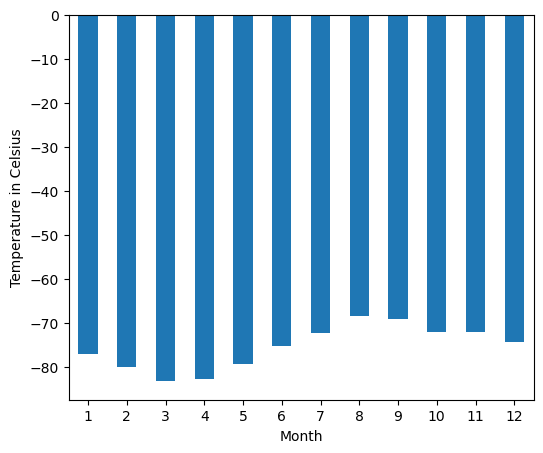

In [143]:
# Plot the average temperature by month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
average_low_temp_by_month.plot(kind='bar', figsize=(6, 5))
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)
plt.show()


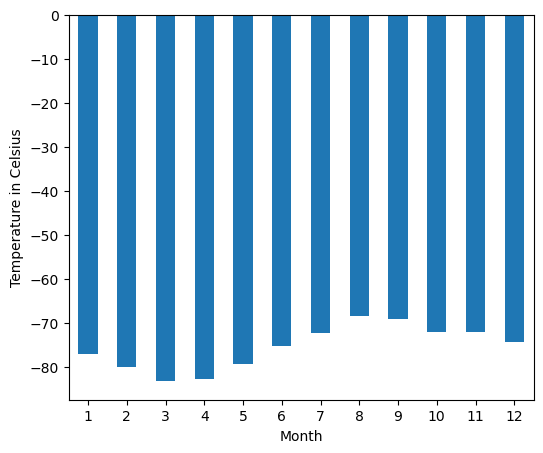

In [150]:
# Identify the coldest and hottest months in Curiosity's location
average_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

# Plot the average temperatures by month
average_temp_by_month.plot(kind='bar', figsize=(6, 5))
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)

plt.show()


In [154]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


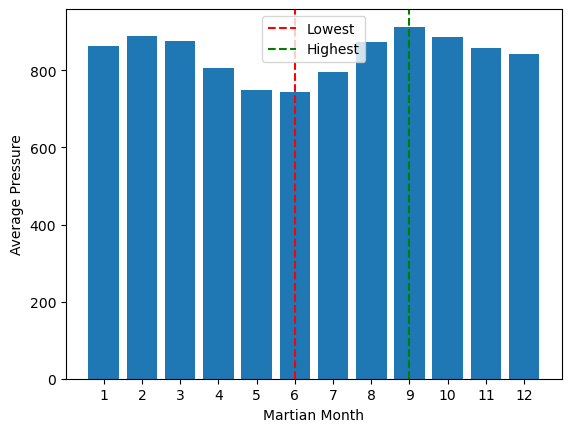

In [165]:
# Plot the average pressure by month
# Calculate the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Find the month with the lowest and highest average pressure
lowest_month = average_pressure_by_month.idxmin()
highest_month = average_pressure_by_month.idxmax()

# Plot the average pressure for all months
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values)
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')

# Highlight the lowest and highest months
plt.axvline(x=lowest_month, color='red', linestyle='--', label='Lowest')
plt.axvline(x=highest_month, color='green', linestyle='--', label='Highest')

plt.xticks(range(1, 13))
plt.legend()
plt.show()


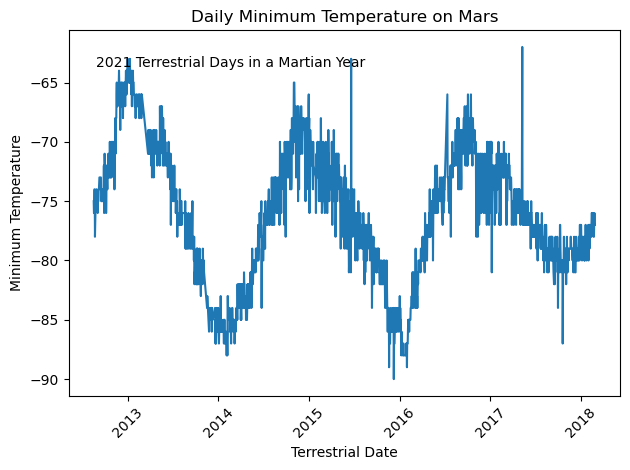

In [173]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate the difference in dates between consecutive minimum temperature data points
date_diff = df['terrestrial_date'].diff()

# Estimate the number of Martian days in a Martian year
martian_year_days = int(date_diff.sum().days)

# Plot the daily minimum temperature
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature')
plt.title('Daily Minimum Temperature on Mars')

# Add a text annotation for the estimated number of terrestrial days in a Martian year
plt.annotate(f'{martian_year_days} Terrestrial Days in a Martian Year', xy=(0.05, 0.9), xycoords='axes fraction')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [174]:
# Write the data to a CSV
sv_filename = 'martian_year_data.csv'

# Write the data to a CSV file
df.to_csv(csv_filename, index=False)

print(f"Data has been successfully written to {csv_filename}")


Data has been successfully written to martian_year_data.csv


In [176]:
# browser.quit()